## Loading libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Uploading dataset 

In [2]:
titanic = pd.read_csv('Titanic_original.csv')
df = pd.DataFrame(titanic)
# dropping columns that do not contribute towards model
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
df['Age'].fillna(df['Age'].mean(),inplace = True) # replacing null values in Age with the mean of age column
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Defining target variable 

In [4]:
targetvar = df['Survived']

## Selecting features used to predict target variable 

In [5]:
feature_cols = ['Pclass','Sex','Age','SibSp','Parch']
sourcevars = df[feature_cols]

## Transforming Categorical Variable using dummy value 

In [6]:
df = pd.get_dummies(df,columns = ['Sex'])

In [7]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [8]:
feature_cols = ['Pclass','Sex_female','Sex_male','Age','SibSp','Parch']
sourcevars  = df[feature_cols] # updating selection features
df.drop('Survived',axis = 1, inplace = True) # removing Survived column as its the target variable
df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


## Importing decision tree function, train and test function 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree

## Splitting the dataset into test and train and calculating accuracy 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size=0.2)

In [11]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(712, 6) (712,)
(179, 6) (179,)


In [12]:
clf = tree.DecisionTreeClassifier() # creating decision tree classifier object
clf = clf.fit(X_train, y_train) # training decision tree classifier
y_pred = clf.predict(X_test) # predicting response for test dataset

In [13]:
from sklearn import metrics
print('Accuracy:%.3f'%metrics.accuracy_score(y_test,y_pred))

Accuracy:0.816


## Plotting decision tree 

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

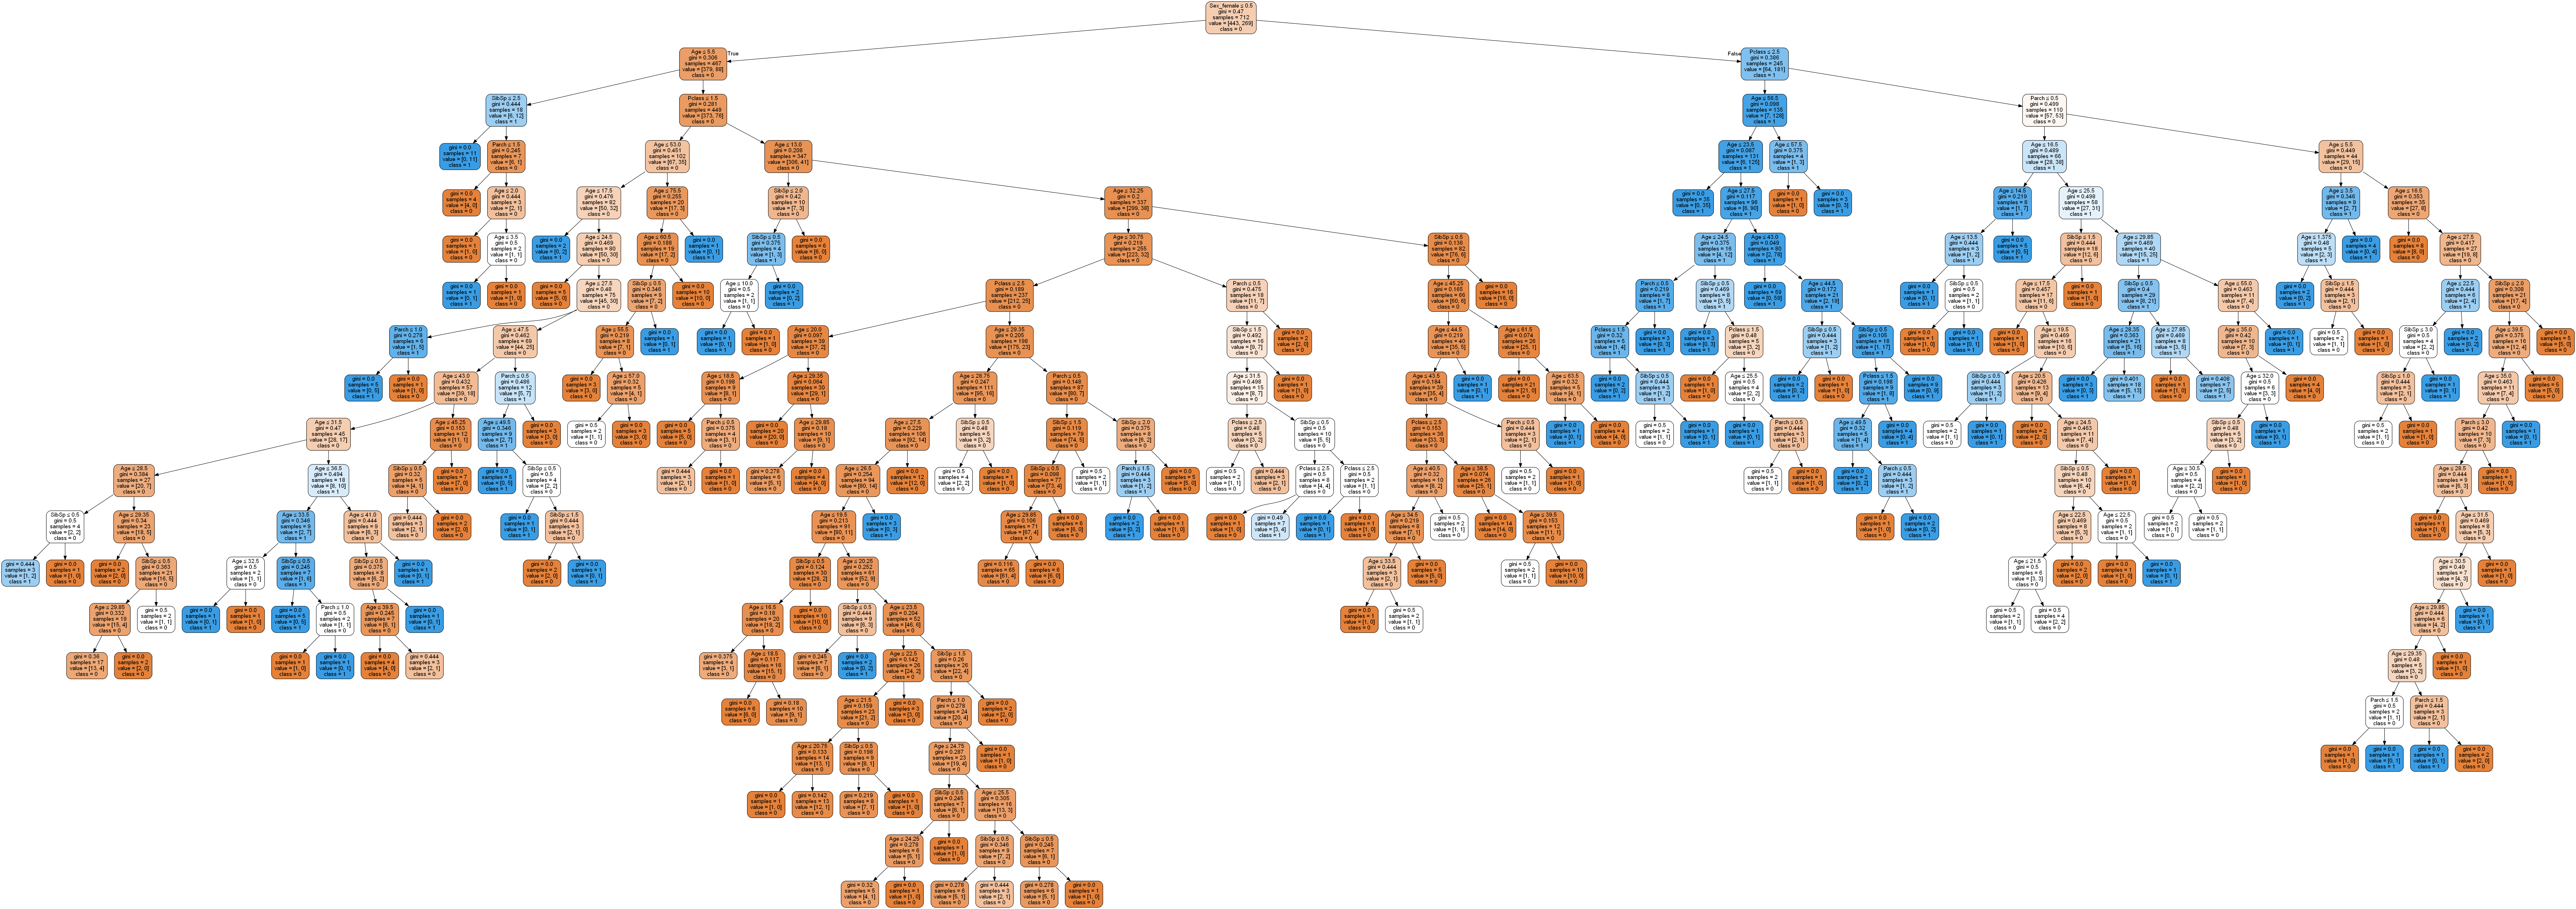

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

## Pruning the Decision Tree 

In [16]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


As can be observed, the accuracy improves due to the pruning.

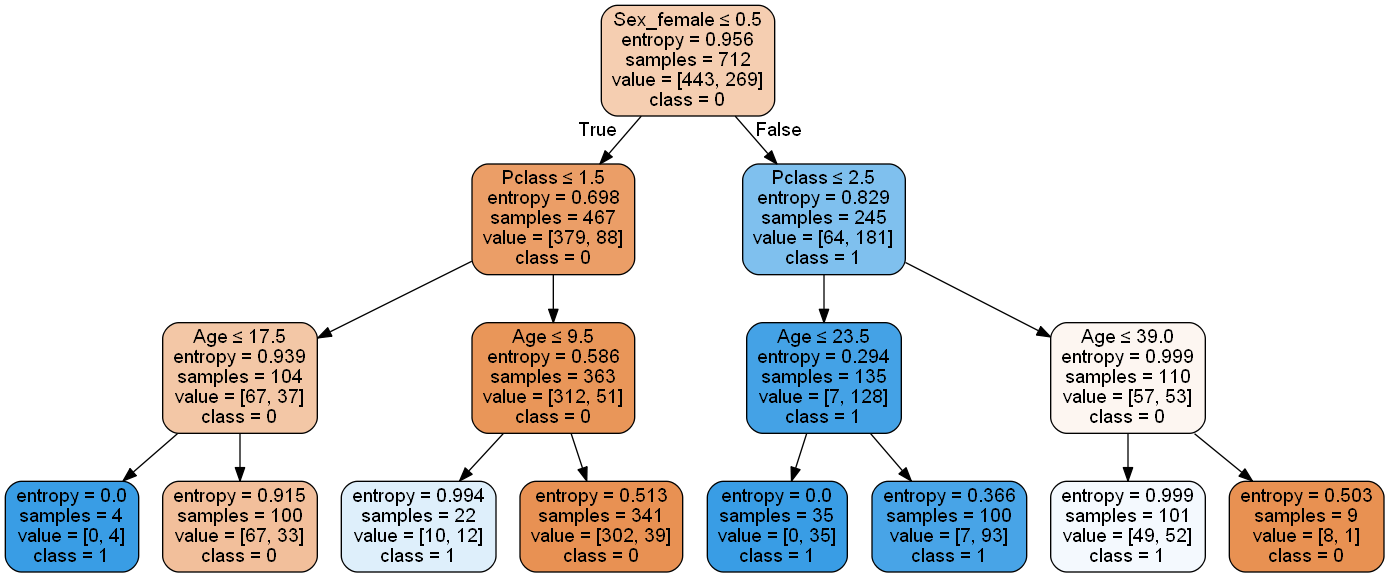

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

## Hyper-parameter tuning of decision tree 

In [18]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
grid_obj = GridSearchCV(clf, parameters, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Feature importance 

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.feature_importances_

array([0.15044366, 0.36816265, 0.        , 0.32088259, 0.10851467,
       0.05199643])

In [20]:
X_train.head()

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch
218,1,1,0,32.000000,0,0
686,3,0,1,14.000000,4,1
500,3,0,1,17.000000,0,0
302,3,0,1,19.000000,0,0
101,3,0,1,29.699118,0,0


As can be seen from the output of features_importances_, Age, Sex and Pclass(class of travel) are important features in determining the probability of survival.

## Confusion matrix 

[[87 19]
 [16 57]]


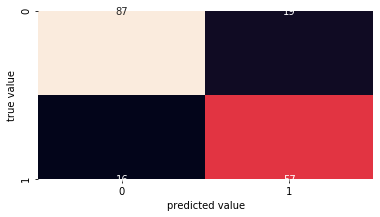

In [21]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
print(mat)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Accuracy and F-1 score 

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       106
           1       0.75      0.78      0.77        73

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

